In [45]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import time

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

In [46]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

In [47]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [48]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

# Lat lon info

In [49]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=1

# Open PIC data

In [51]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [52]:
all_events_pic = numpy.load('csv_files/all_events_pic.npy')

In [54]:
print(all_events_pic.shape)

(650, 1798)


# open rcp8.5 data (want seasonal values of precip throughout the 180 years)

In [50]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

In [65]:
year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]+['{:03d}'.format(i) for i in range(101,106)]

n_seasons_hist_rcp=year_end-year_start

In [66]:
all_events_hist_rcp_3d = numpy.load('csv_files/all_events_hist_rcp_3d.npy')
print(all_events_hist_rcp_3d.shape)

(650, 40, 180)


# Now reshape and pull out LA time series

In [67]:
rcp_totals_reshape = all_events_hist_rcp_3d.reshape((PRECT_nlat, PRECT_nlon,40,180))
rcp_totals_LA = rcp_totals_reshape[9,17,:,:]

pic_totals_reshape = all_events_pic.reshape((PRECT_nlat, PRECT_nlon, -1))
pic_totals_LA = pic_totals_reshape[9,17,:]
#count_ratio = ((hist_rcp_counts/(30*40)).T/(pic_counts/1798)).T
#count_ratio_2d = count_ratio.reshape((PRECT_nlat, PRECT_nlon, 150))
#count_ratio_2d_cali = numpy.mean( count_ratio_2d[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:].reshape((11,3,150)) , axis=1)

# Now plot rcp_totals_LA

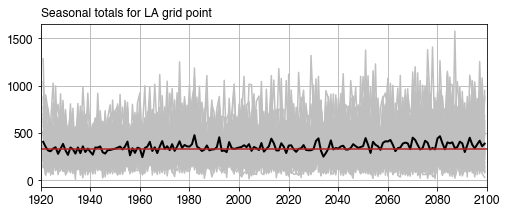

In [79]:
fontsize=12

xvals = numpy.arange(1921,2100)
fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111)

for i in range(40):
    ax.plot(xvals, rcp_totals_LA[i,1:], c='0.75')
ax.plot(xvals, rcp_totals_LA.mean(axis=0)[1:], c='black', lw=2)

ax.tick_params(labelsize=fontsize)
ax.grid()
ax.set_axisbelow(True)

ax.set_xlim(1920,2100)

ax.text(s='Seasonal totals for LA grid point', \
        x=0, y=1.03, \
        ha='left', \
        va='bottom', \
        transform=ax.transAxes, \
        fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, \
          scatterpoints=1, ncol=2, bbox_to_anchor=(0.03,0.95), \
          bbox_transform=ax.transAxes, loc='upper left', \
          borderaxespad=0, labelspacing=0.25, fancybox=False, \
          edgecolor='None', framealpha=0, borderpad=0., handletextpad=0.25)

ax.axhline(y=pic_totals_LA.mean(), c='firebrick')
fig.savefig('time_series_LA_seasonal_totals.pdf', bbox_inches='tight', transparent=True)

#print(pic_counts_LA)
#mp.plot(hist_rcp_counts_LA)


In [69]:
rcp_totals_LA.shape

(40, 180)

In [72]:
rcp_totals_LA_df = pandas.DataFrame(rcp_totals_LA.T, index=season_strings_hist_rcp, columns=member_strings_hist_rcp)
rcp_totals_LA_df.to_csv('csv_files/rcp_seasonal_totals_LA.csv')

In [80]:
pic_totals_LA_df = pandas.DataFrame(pic_totals_LA.T, index=season_strings_pic, columns=['PIC'])
pic_totals_LA_df.to_csv('csv_files/pic_seasonal_totals_LA.csv')

In [77]:
#pic_totals_LA_df
numpy.mean(pic_totals_LA)

332.11814963539132